In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

N=10000

In [2]:
def running_mean(X,N,N1):
    "returns the mean up to the i-th point"
    Y=np.cumsum(X,axis=0)
    o=np.ones(N)
    o2=np.cumsum(o).reshape(-1,1)
    return(Y/o2)

In [3]:
o=np.ones(100)
o2=np.cumsum(o).reshape(-1,1)
o2.shape

(100, 1)

# Gaussian

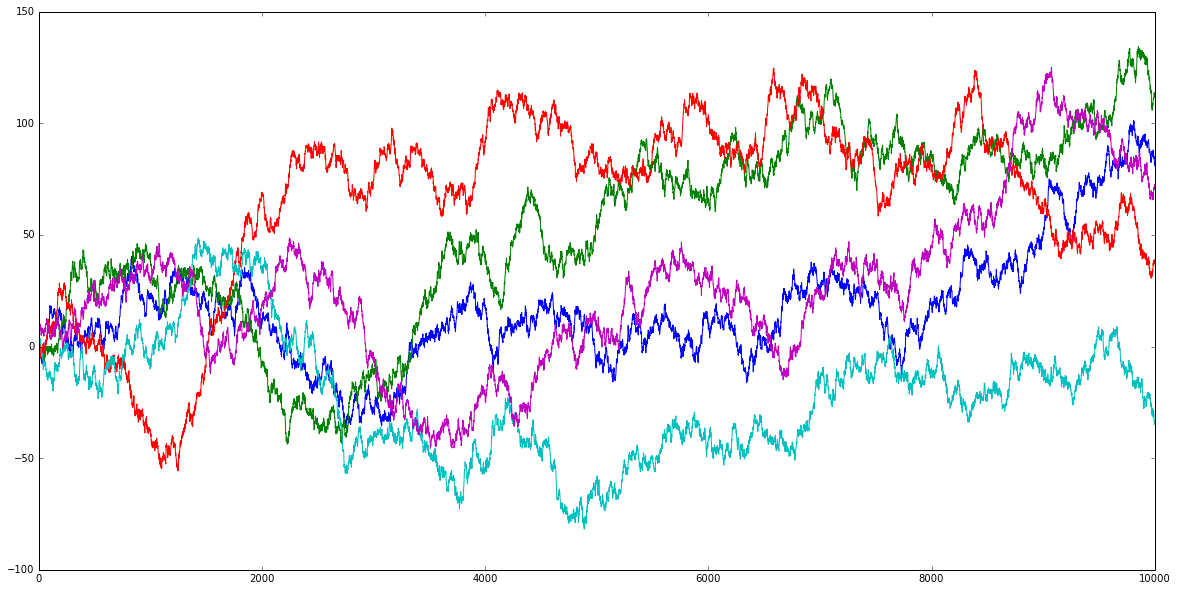

In [4]:
N1=5
X1=np.random.normal(0,1,N*N1)
X1=X1.reshape(N,N1)
    
plt.figure(figsize=(20,10))
S1=np.cumsum(X1,axis=0)
plt.plot(S1);

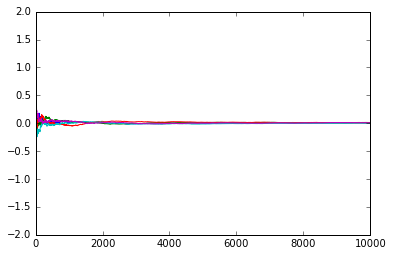

In [5]:
#this is the mean at each step
plt.plot(running_mean(X1,N,N1));

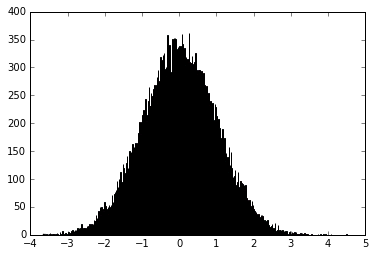

In [6]:
plt.hist(X1,bins=100);

In [7]:
np.random.normal?

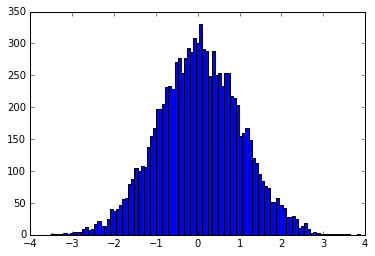

In [8]:
#I sum M1 realizations, and do this M2 times.
# I study how the M2 sums distribute

M1=100
M2=10000
std=10
A1=np.random.normal(0,std,M1*M2)
A1=A1.reshape(M1,M2)
A1_sum=A1.sum(axis=0)/np.sqrt(M1)/std
plt.hist(A1_sum,bins=100);

# Cauchy

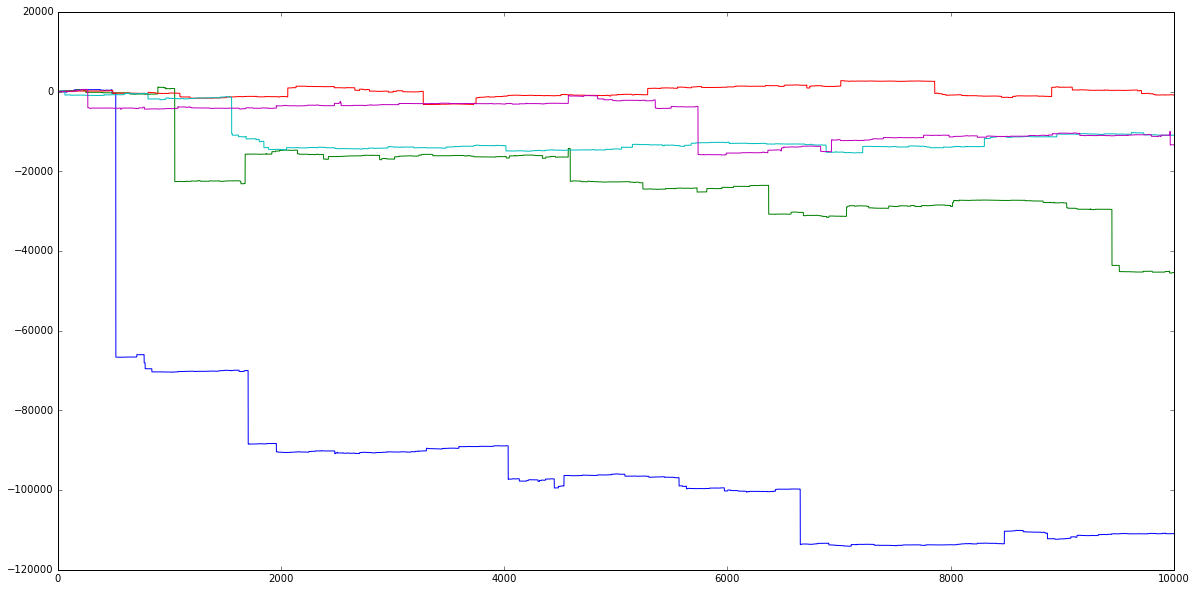

In [9]:
X2=np.random.standard_cauchy(N*N1)
X2=X2.reshape(N,N1)
S2=np.cumsum(X2,axis=0)

plt.figure(figsize=(20,10))
plt.plot(S2);

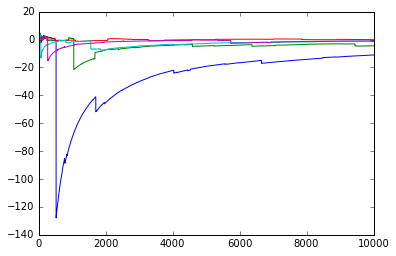

In [25]:
#pdf of the mean should not decay
plt.plot(running_mean(X2,N,N1))

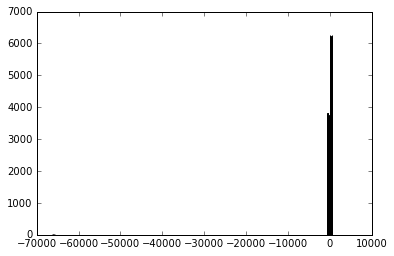

In [11]:
plt.hist(X2,bins=100);

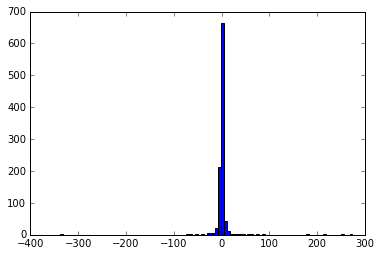

In [32]:
M1=100
M2=1000
A2=np.random.standard_cauchy(M1*M2)
A2=A2.reshape(M1,M2)
A2_sum=A2.sum(axis=0)/(M1)  #should still be cauchy (pdf of the sum)
plt.hist(A2_sum,bins=100);

# Uniform

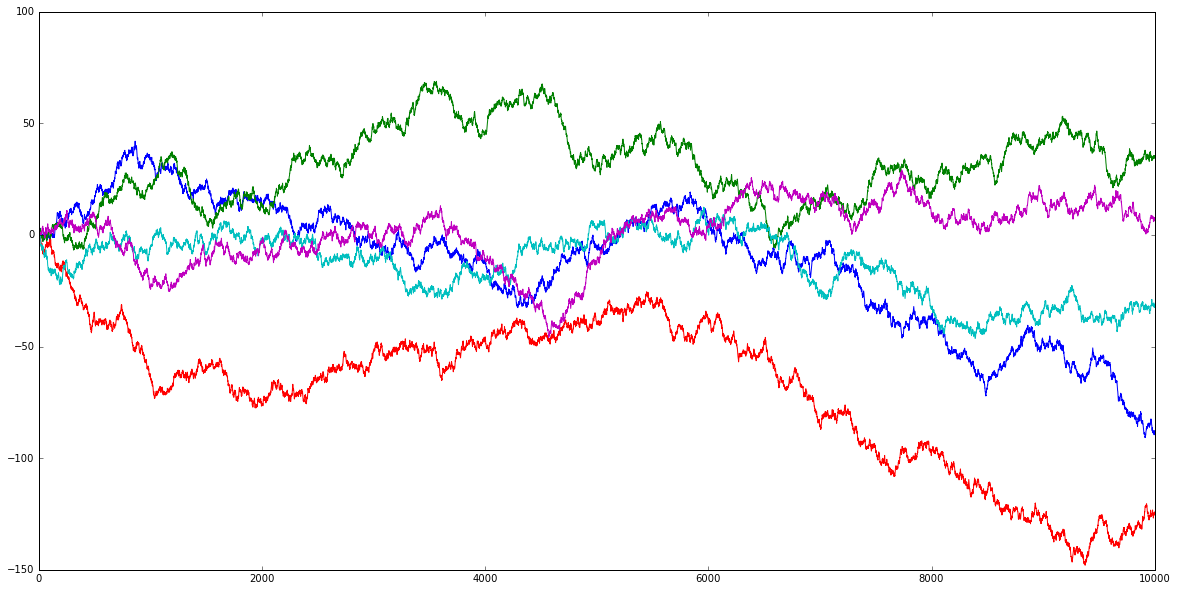

In [13]:
X3=np.random.uniform(-1,1,N*N1)
X3=X3.reshape(N,N1)
S3=np.cumsum(X3,axis=0)

plt.figure(figsize=(20,10))
plt.plot(S3);

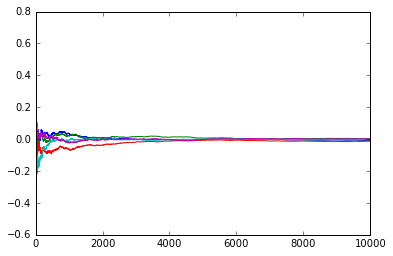

In [14]:
plt.plot(running_mean(X3,N,N1));

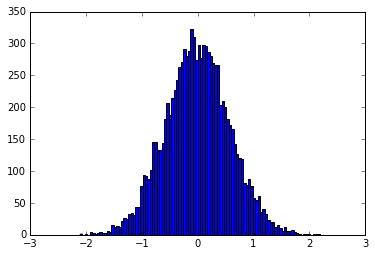

In [15]:
M1=100
M2=10000
A3=np.random.uniform(-1,1,M1*M2)
A3=A3.reshape(M1,M2)
A3_sum=A3.sum(axis=0)/np.sqrt(M1)
plt.hist(A3_sum,bins=100);

# Student

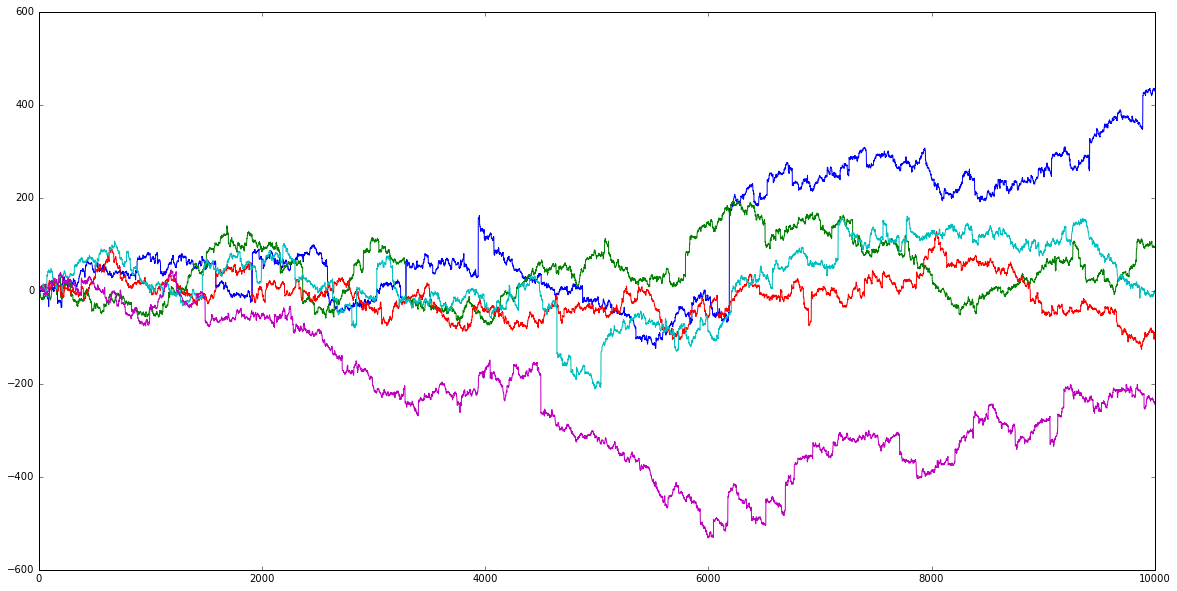

In [16]:
#goes like 1/x^(df+1) for large x (x>>sqrt(df))
#df=1 is the cauchy
#df=inf is the gaussian (wiener)
#df=2 looks like wiener but with jumps

df=2
X4=np.random.standard_t(df,N*N1)
X4=X4.reshape(N,N1)
S4=np.cumsum(X4,axis=0)

plt.figure(figsize=(20,10))
plt.plot(S4);

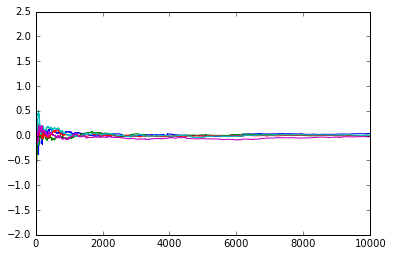

In [17]:
plt.plot(running_mean(X4,N,N1));

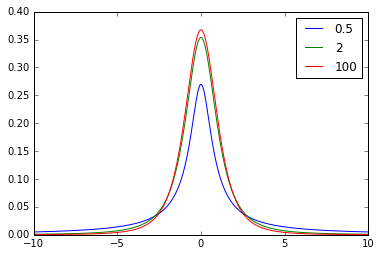

In [18]:
from scipy import stats
x=np.linspace(-10,10,1000)
plt.plot(x,stats.t.pdf(x,0.5),label="0.5")
plt.plot(x,stats.t.pdf(x,2),label="2")
plt.plot(x,stats.t.pdf(x,3),label="100")
plt.legend();

In [20]:
alpha=1
beta=0
#rv = stats.levy_stable(alpha, beta)
#plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

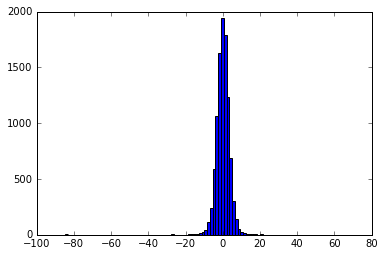

In [21]:
M1=1000
M2=10000
df=2
A4=np.random.standard_t(df,M1*M2)
A4=A4.reshape(M1,M2)
A4_sum=A4.sum(axis=0)/np.sqrt(M1)
plt.hist(A4_sum,bins=100);  

# Compare walks for different time length

### Gauss

In [22]:
N1=5
N2=1000
X1b=np.random.normal(0,1,N2*N1)
X1b=X1b.reshape(N2,N1)
ratio=N/N2
print(ratio)

10.0


NameError: name 'S1b' is not defined

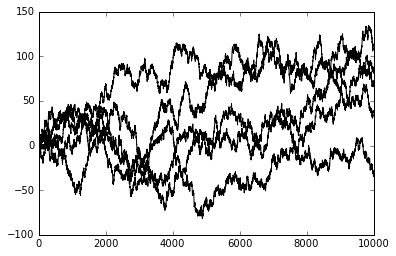

In [23]:
power=1/2

plt.plot(np.arange(0,S1.shape[0]),S1,c='k')
plt.plot(ratio*np.arange(0,S1b.shape[0]),ratio**power*S1b,c='r');


### Cauchy

In [ ]:
X2b=np.random.standard_cauchy(N2*N1)
X2b=X2b.reshape(N2,N1)
S2b=np.cumsum(X2b,axis=0)

In [ ]:
power=1

plt.plot(np.arange(0,S2.shape[0]),S2,c='k')
plt.plot(ratio*np.arange(0,S2b.shape[0]),ratio**power*S2b,c='r');

### Uniform

In [ ]:
X3b=np.random.uniform(-1,1,N2*N1)
X3b=X3b.reshape(N2,N1)
S3b=np.cumsum(X3b,axis=0)

In [ ]:
power=1/2

plt.plot(np.arange(0,S3.shape[0]),S3,c='k')
plt.plot(ratio*np.arange(0,S3b.shape[0]),ratio**power*S3b,c='r');

### Student

In [ ]:
df=1
N1=10
X4=np.random.standard_t(df,N*N1)
X4=X4.reshape(N,N1)
S4=np.cumsum(X4,axis=0)
X4b=np.random.standard_t(df,N2*N1)
X4b=X4b.reshape(N2,N1)
S4b=np.cumsum(X4b,axis=0)

In [ ]:
power=1/min(df,2)
print(power)

plt.plot(np.arange(0,S4.shape[0]),S4,c='k')
plt.plot(ratio*np.arange(0,S4b.shape[0]),ratio**power*S4b,c='r');

In [59]:
from math import ceil
c_max=32
n=ceil(np.log2(c_max))
print(n)
x


5
0 00000
1 00001
2 00010
3 00011
4 00100
5 00101
6 00110
7 00111
8 01000
9 01001
10 01010
11 01011
12 01100
13 01101
14 01110
15 01111
16 10000
17 10001
18 10010
19 10011
20 10100
21 10101
22 10110
23 10111
24 11000
25 11001
26 11010
27 11011
28 11100
29 11101
30 11110
31 11111
